In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [15]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep =',')

In [16]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [20]:
fashion_train_df.shape

(60000, 785)

In [21]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [22]:
training.shape

(60000, 785)

In [23]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

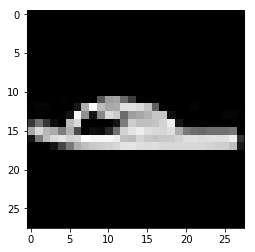

In [25]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape((28,28)) )
plt.imshow(training[i,1:].reshape((28,28)) , cmap = 'gray')


In [26]:
label = training[i,0]
label

5.0

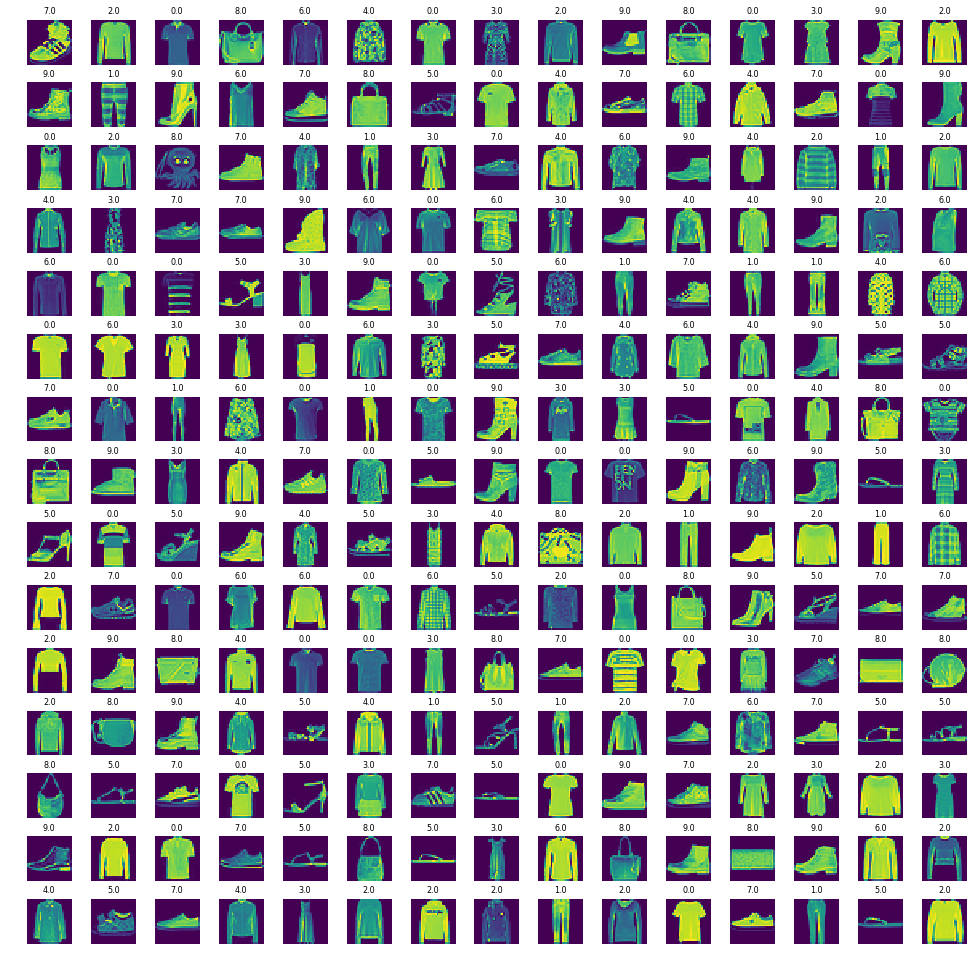

In [27]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid, W_grid,figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    
    axes[i].imshow(training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [28]:
X_train = training[:,1:]/255
Y_train = training[:,0]

X_test = testing[:,1:]/255
Y_test = testing[:,0]


In [29]:
from sklearn.model_selection import train_test_split

X_train , X_validate, Y_train,Y_validate = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 12345)

In [30]:
X_train.shape

(48000, 784)

In [31]:
Y_train.shape

(48000,)

In [32]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [33]:
X_train.shape

(48000, 28, 28, 1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [35]:
X_validate.shape

(12000, 28, 28, 1)

In [36]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard



In [37]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [42]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
epochs = 50

history = model.fit(X_train,
                        Y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, Y_validate))


W0211 18:37:03.477258 4540777920 training.py:792] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 44s 907us/sample - loss: 0.9253 - accuracy: 0.6560 - val_loss: 0.5166 - val_accuracy: 0.8094
Epoch 2/50
48000/48000 [==============================] - 43s 900us/sample - loss: 0.5410 - accuracy: 0.8006 - val_loss: 0.4300 - val_accuracy: 0.8427
Epoch 3/50
48000/48000 [==============================] - 42s 880us/sample - loss: 0.4740 - accuracy: 0.8290 - val_loss: 0.3814 - val_accuracy: 0.8608
Epoch 4/50
48000/48000 [==============================] - 43s 895us/sample - loss: 0.4316 - accuracy: 0.8435 - val_loss: 0.3511 - val_accuracy: 0.8732
Epoch 5/50
48000/48000 [==============================] - 42s 875us/sample - loss: 0.4090 - accuracy: 0.8510 - val_loss: 0.3348 - val_accuracy: 0.8784
Epoch 6/50
48000/48000 [==============================] - 45s 944us/sample - loss: 0.3908 - accuracy: 0.8590 - val_loss: 0.3287 - val_accuracy: 0.8798
Epoch 7/50
48000/48000 [====================

In [44]:
evaluation = model.evaluate(X_test,Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 233us/sample - loss: 0.1981 - accuracy: 0.9290
Test Accuracy : 0.929


In [45]:
predicted_classes = model.predict_classes(X_test)

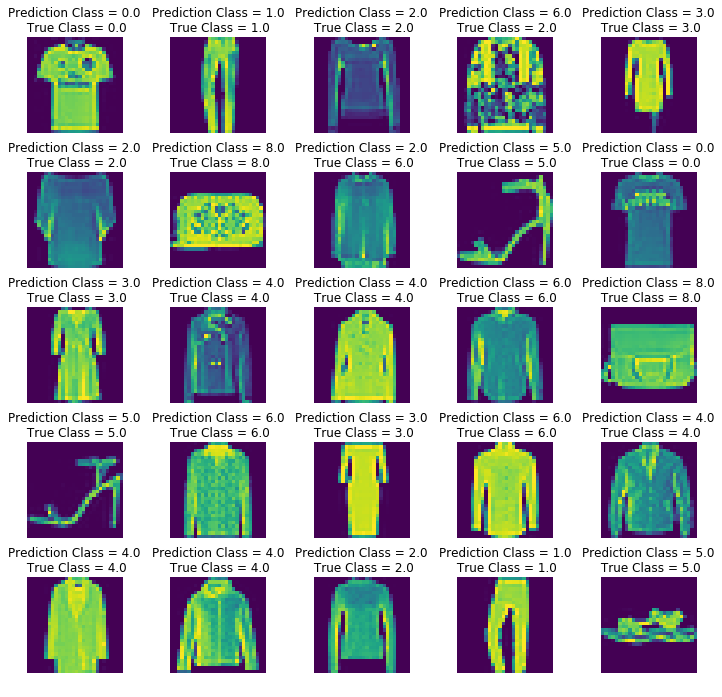

In [48]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

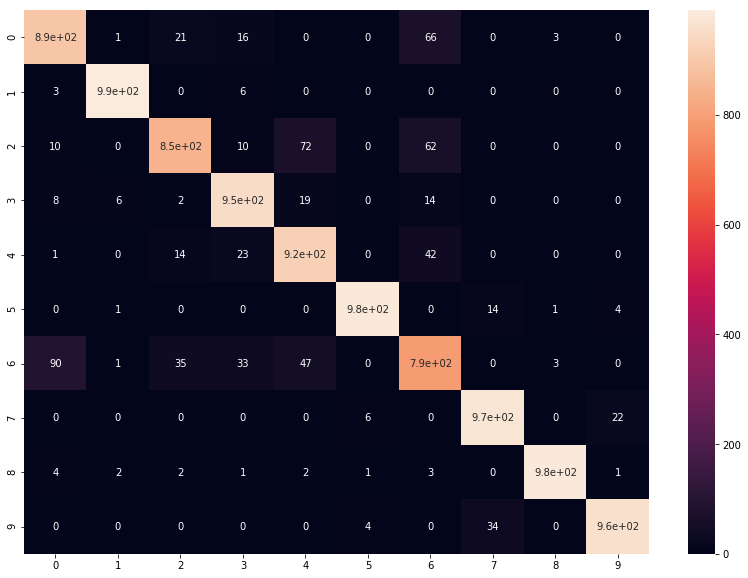

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [52]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.85      0.88      1000
     Class 3       0.91      0.95      0.93      1000
     Class 4       0.87      0.92      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.79      0.80      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

